In [1]:
! pip install seaborn -q -q
! pip install pandas -q -q
! pip install matplotlib -q -q

In [3]:
import sys
print(f'virtualenv: {sys.prefix}')

virtualenv: /Users/ivankorol/xpl/code/xplplatform/venvs/xpl/infrastructure/storage


In [4]:
import pandas
import matplotlib.pyplot as plt

In [6]:
df = pandas.read_csv('load_test_results.csv')
df.head(5)

,operation,write_to,time_of_experiment,caller_location,bucket_location,storage_class,cpu_model,number_of_cores,number_of_virtual_cores,total_ram,number_of_processes,coroutines_batch_size,total_transferred_files,total_transferred_bytes,total_lost_files,total_lost_bytes,time_in_seconds,cpu_percent_used_avg,ram_used_avg
0,download_async_test,disk,2021-05-23 14:38:25.795036,europe-west4-c,EUROPE-WEST4,STANDARD,n1-standard-8,4,8,31562211328,1,1600,10000,3060964868,0,-1,22.377231,12.742188,9.597997e+08
1,download_async_test,disk,2021-05-23 14:38:49.030442,europe-west4-c,EUROPE-WEST4,STANDARD,n1-standard-8,4,8,31562211328,1,800,10000,3060964868,0,-1,24.616303,12.831592,9.799782e+08
2,download_async_test,disk,2021-05-23 14:39:14.671529,europe-west4-c,EUROPE-WEST4,STANDARD,n1-standard-8,4,8,31562211328,1,400,10000,3060964868,0,-1,29.344850,12.704721,9.888551e+08
3,download_async_test,disk,2021-05-23 14:39:44.854290,europe-west4-c,EUROPE-WEST4,STANDARD,n1-standard-8,4,8,31562211328,1,200,10000,3060964868,0,-1,34.535617,12.705103,1.034538e+09
4,download_async_test,disk,2021-05-23 14:40:20.357333,europe-west4-c,EUROPE-WEST4,STANDARD,n1-standard-8,4,8,31562211328,1,100,10000,3060964868,0,-1,41.959910,12.409856,1.009913e+09


In [16]:
df['speed'] = df['total_transferred_bytes'] / df['time_in_seconds'] / 1024 / 1024
df['total_coroutines'] = df['number_of_processes'] * df['coroutines_batch_size']
df['ram_used_avg_mb'] = df['ram_used_avg'] / 1024 / 1024

# df = df[(df['bucket_location'] == 'EUROPE-WEST4')]

df_display = df[['operation','number_of_processes', 'total_coroutines', 'cpu_percent_used_avg', 'ram_used_avg', 'speed']]
# df_display = df[['operation','number_of_processes', 'total_coroutines', 'cpu_percent_used_avg', 'ram_used_avg', 'speed']]
df_display['number_of_processes'] = df_display['number_of_processes'].astype('category')
# df_display.loc[:, ('number_of_processes')] = df_display['number_of_processes'].astype('category')

df_display.tail(10)
# eights = df1[(df1["total_coroutines"] == 800)]
# eights = eights[['number_of_processes', 'cpu_percent_used_avg', 'ram_used_avg', 'speed']]
# fours = df1[(df1["total_coroutines"] == 400)]
# twos = df1[(df1["total_coroutines"] == 200)]
# eights.head(100)

<ipython-input-16-daa93adb8286>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_display['number_of_processes'] = df_display['number_of_processes'].astype('category')


,operation,number_of_processes,total_coroutines,cpu_percent_used_avg,ram_used_avg,speed
64,download_multiprocessing_async_test,16,800,8.019045,2.745663e+09,303.857685
65,download_multiprocessing_async_test,16,400,49.762500,2.216458e+09,300.882351
66,download_multiprocessing_async_test,16,192,49.385185,2.001864e+09,271.280224
67,download_multiprocessing_async_test,16,96,36.024112,1.538351e+09,180.822508
68,download_multiprocessing_async_test,16,48,31.088205,1.215432e+09,104.240507
69,download_multiprocessing_test,16,0,6.241951,9.930085e+08,46.507725
70,download_multiprocessing_test,8,0,3.466206,9.272417e+08,24.329113
71,download_multiprocessing_test,4,0,3.088039,9.774313e+08,12.459788
72,download_multiprocessing_test,2,0,1.677260,9.134764e+08,6.263464
73,download_multiprocessing_test,1,0,0.893682,8.792072e+08,3.210015


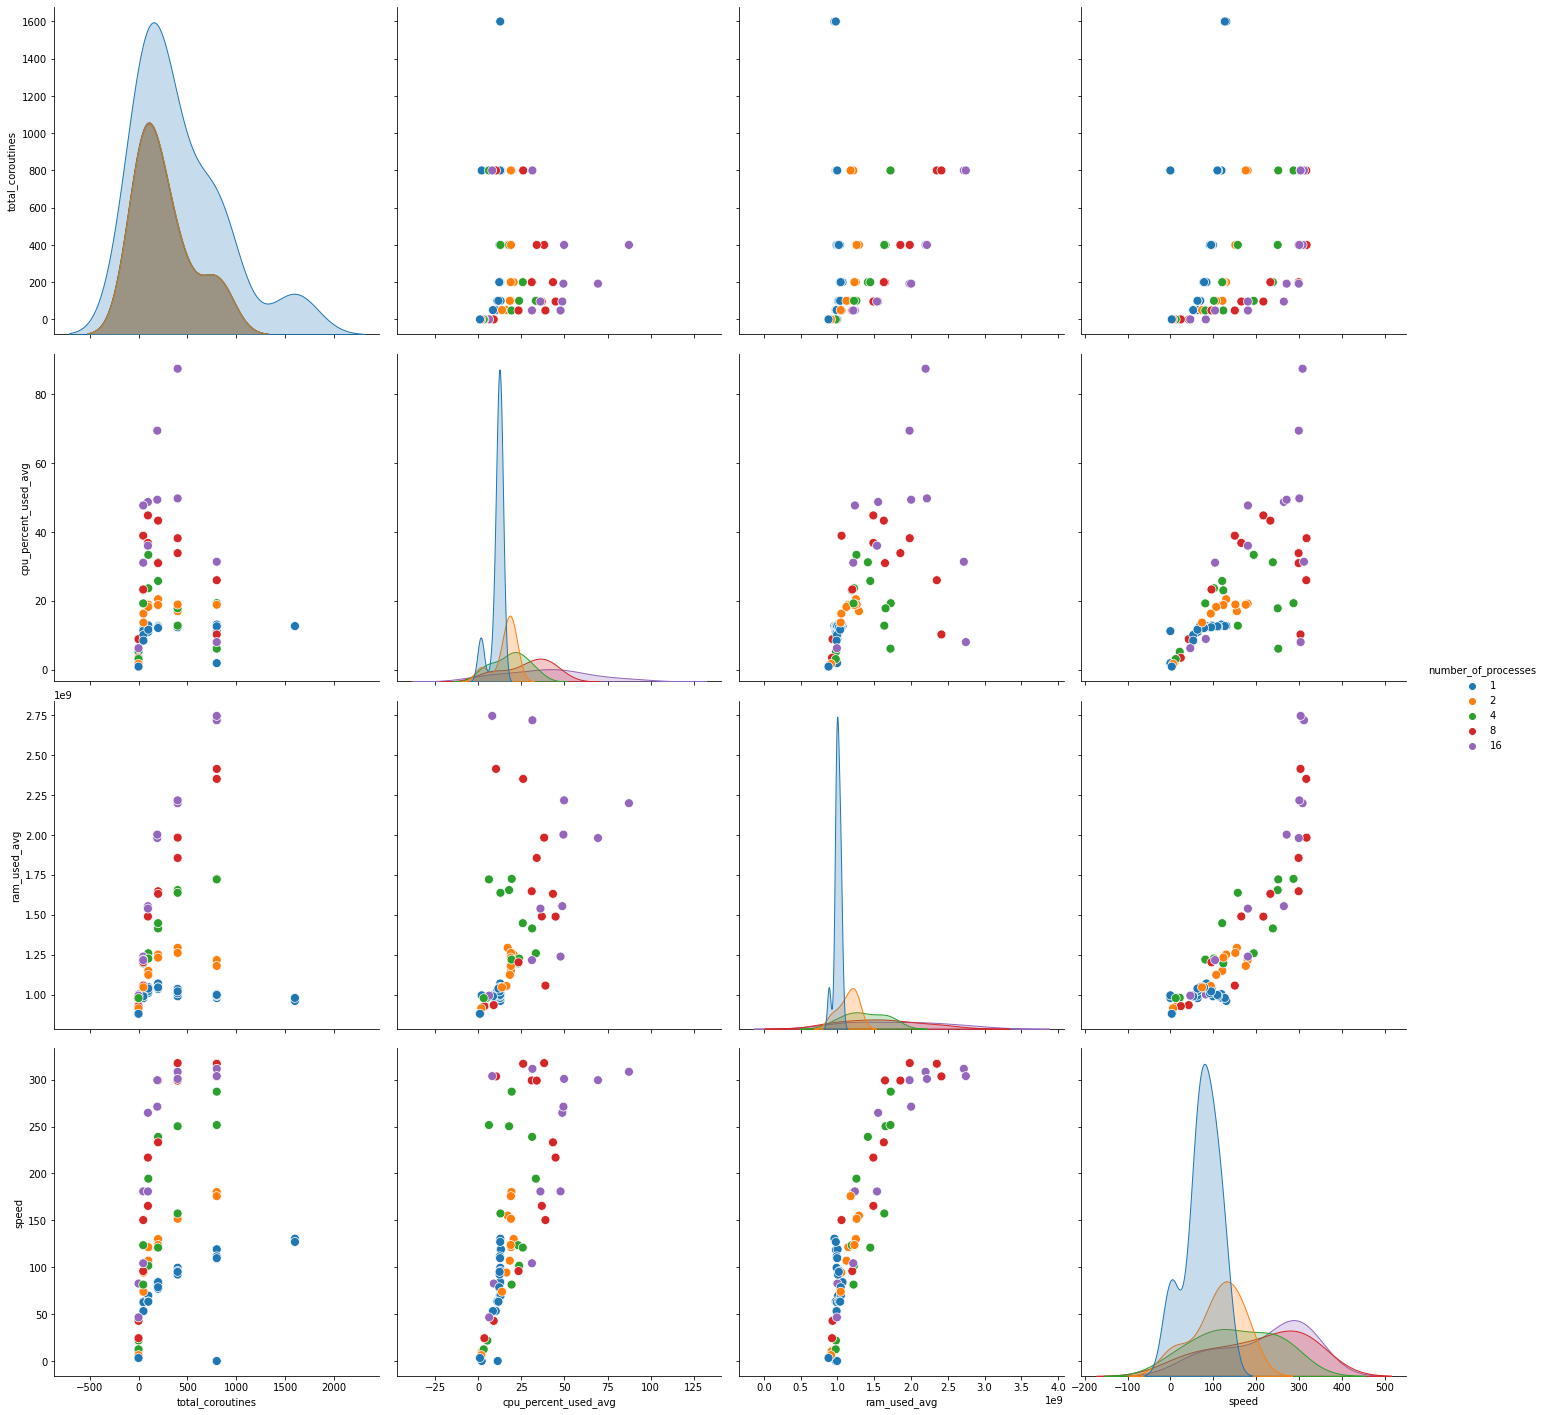

In [17]:
import seaborn as sns
sns.pairplot(df_display, hue='number_of_processes', height=5, plot_kws={"s":80})

In [ ]:
g = pandas.plotting.scatter_matrix(eights, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()